In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

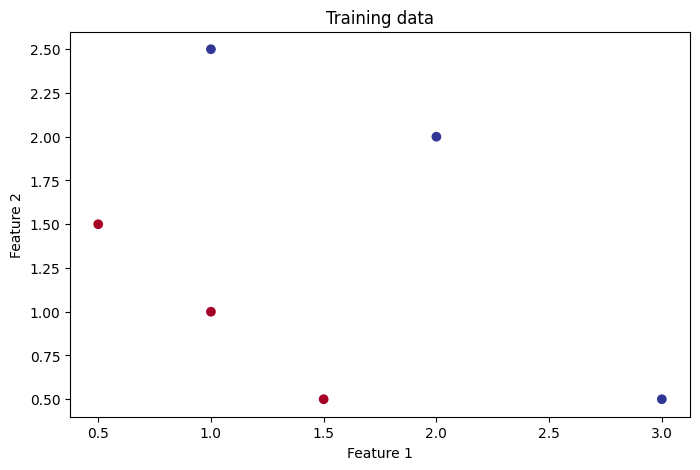

In [3]:
plt.figure(figsize=(8, 5))

plt.title('Training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

In [5]:
def get_cost_logistic_regression(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    a = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost

## Logistic Gradient Descent

In [10]:
def get_grandient_logistic(X, y, w, b):
    m, n = X.shape
    d_dw = np.zeros(w.shape)
    d_db = 0

    for i in range(m):
        y_hat = sigmoid(np.dot(w, X[i]) + b)
        error = y_hat - y[i]
        for j in range(n):
            d_dw[j] += error * X[i][j]
        d_db += error

    d_dw /= m
    d_db /= m

    return d_dw, d_db

In [11]:
def get_gradient_descent(X, y, w_in, b_in, alpha, num_iter):
    # An array to store the cost function values
    J = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iter):
        d_dw, d_db = get_grandient_logistic(X, y, w, b)

        w = w - alpha * d_dw
        b = b - alpha * d_db

        if i < 1000000: # prevent resource exhaustion
            J.append(get_cost_logistic_regression(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i}: Cost = {J[-1]}")

    return w, b, J

### Runing

In [12]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = get_gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration 0: Cost = 0.6846104685605738
Iteration 1000: Cost = 0.1590977666870457
Iteration 2000: Cost = 0.08460064176930084
Iteration 3000: Cost = 0.05705327279402531
Iteration 4000: Cost = 0.04290759421682
Iteration 5000: Cost = 0.034338477298845566
Iteration 6000: Cost = 0.02860379802212006
Iteration 7000: Cost = 0.02450156960879306
Iteration 8000: Cost = 0.02142370332569295
Iteration 9000: Cost = 0.019030137124109114

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


### Plot

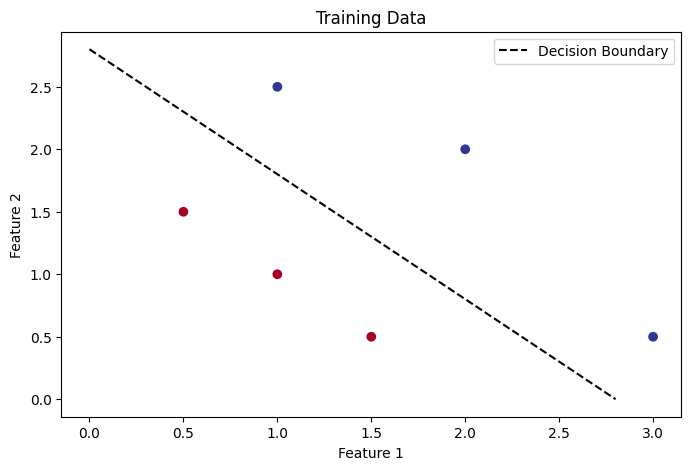

In [13]:
plt.figure(figsize=(8, 5))

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')

# Plot the decision boundary
x0 = -b_out / w_out[0]
x1 = -b_out / w_out[1]
plt.plot([0, x1], [x1, 0], 'k--', label='Decision Boundary')
plt.legend()